<a href="https://colab.research.google.com/github/gestanestle/orange-BE/blob/krimaster/Orange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import libs**

In [1]:
%tensorflow_version 2.15.0  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/gdrive')

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Clear keras backend**

In [2]:
tf.keras.backend.clear_session()

### **Load dataset**


In [3]:
import os

image_dir = ("/content/gdrive/MyDrive/orange-aug")

data = utils.image_dataset_from_directory(image_dir)


Found 1592 files belonging to 2 classes.


### **Show data**

Unique class names: {'RottenOrange', 'FreshOrange'}


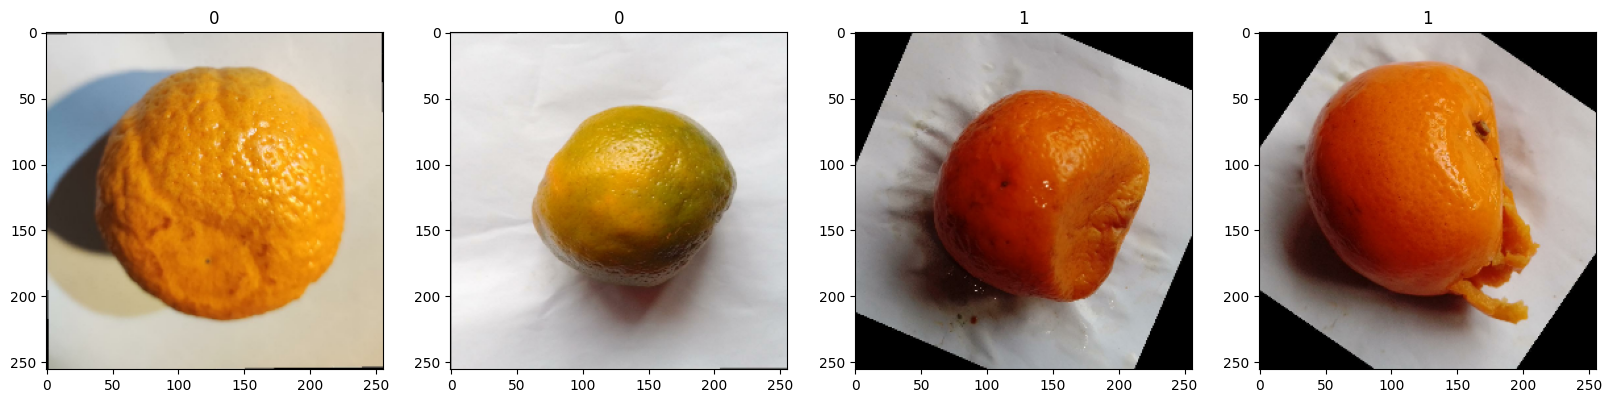

In [4]:
data_iterator = data.as_numpy_iterator()


batch = data_iterator.next()


fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Get class names
class_names = data.class_names

# Print unique class names
print(f"Unique class names: {set(class_names)}")

### **Scale data**

In [5]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

### **Split data**

In [6]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [7]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [8]:
train
print(train_size)
print(val_size)
print(test_size)

35
10
6


### **Layering**

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3,3), 1, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(16, (3,3), 1, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### **Training**

In [11]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [12]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train, epochs=10, validation_data=val,  callbacks=[tensorboard_callback])

Epoch 1/10
35/35 [==============================] - 84s 2s/step - loss: 0.7296 - accuracy: 0.5179 - val_loss: 0.6945 - val_accuracy: 0.4500
Epoch 2/10
35/35 [==============================] - 85s 2s/step - loss: 0.6895 - accuracy: 0.5429 - val_loss: 0.6893 - val_accuracy: 0.5375
Epoch 3/10
35/35 [==============================] - 86s 2s/step - loss: 0.6444 - accuracy: 0.6259 - val_loss: 0.4582 - val_accuracy: 0.7688
Epoch 4/10
35/35 [==============================] - 86s 2s/step - loss: 0.3909 - accuracy: 0.8607 - val_loss: 0.2975 - val_accuracy: 0.8938
Epoch 5/10
35/35 [==============================] - 86s 2s/step - loss: 0.3026 - accuracy: 0.8973 - val_loss: 0.1775 - val_accuracy: 0.9500
Epoch 6/10
35/35 [==============================] - 82s 2s/step - loss: 0.1887 - accuracy: 0.9357 - val_loss: 0.1400 - val_accuracy: 0.9563
Epoch 7/10
35/35 [==============================] - 84s 2s/step - loss: 0.1224 - accuracy: 0.9571 - val_loss: 0.1424 - val_accuracy: 0.9531
Epoch 8/10
35/35 [==

### **Plotting the history**

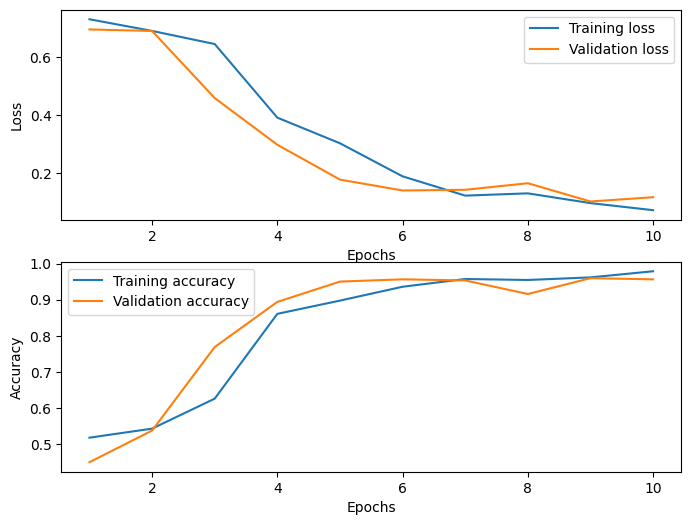

In [13]:
def plot_history(history):
    """
    Plots the training history (epochs, loss, and accuracy) of a Keras model.
    """
    # Get the training history data
    epochs = range(1, len(history.history['loss']) + 1)
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    # Create the figure and axes
    fig, ax = plt.subplots(2, figsize=(8, 6))

    # Plot the loss and accuracy
    ax[0].plot(epochs, loss, label='Training loss')
    ax[0].plot(epochs, val_loss, label='Validation loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].plot(epochs, acc, label='Training accuracy')
    ax[1].plot(epochs, val_acc, label='Validation accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    # Show the plot
    plt.show()


plot_history(history)

### **Evaluating**

In [14]:
test_loss, test_acc = model.evaluate(test, verbose=2)

5/5 - 13s - loss: 0.1087 - accuracy: 0.9671 - 13s/epoch - 3s/step


In [15]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 630ms/step


### **Predicting**

In [16]:
predictions = model.predict(test)

5/5 [==============================] - 13s 384ms/step


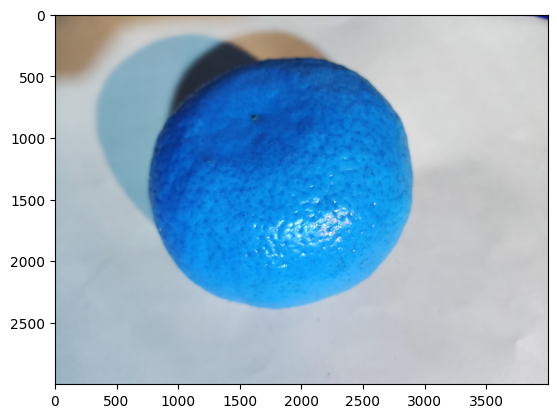

In [17]:
import cv2
import numpy as np

img = cv2.imread('/content/gdrive/MyDrive/orange/FreshOrange/FreshOrange (100).jpg')
plt.imshow(img)
plt.show()

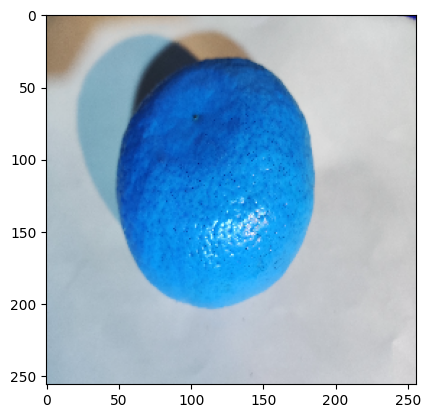

In [18]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [19]:
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted fruit is rotten.')
else:
    print(f'Predicted fruit is fresh.')

yhat

1/1 [==============================] - 0s 33ms/step
Predicted fruit is fresh.


array([[0.14277136]], dtype=float32)

### **Saving**

In [21]:
model.save("keras_model/orange.keras")
model.save("keras_model/orange.h5")
new_model = tf.keras.models.load_model('keras_model/orange.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **H5 to TFLite**

In [22]:
# Load Keras model
keras_model = tf.keras.models.load_model('keras_model/orange.keras')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

# Save the converted model
with open('keras_model/orange.tflite', 'wb') as f:
    f.write(tflite_model)


### **Download files**

In [23]:
from google.colab import files
files.download('keras_model/orange.keras')
files.download('keras_model/orange.h5')
files.download('keras_model/orange.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>